In [1]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop
# from keras.engine import Model
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rnn_classif_network(T, D):
    inputs = Input(name='input', shape=[T, D])
    layer = SimpleRNN(50, return_sequences=False)(inputs)
    predictions = Dense(10, activation='softmax')(layer)
    network = Model(inputs=inputs, outputs=predictions)
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

### 1. Completez le code suivant

(60000, 28, 28)


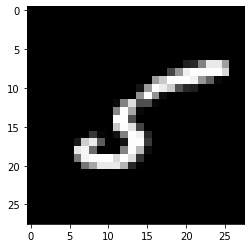

Epoch 1/3
625/625 [==============================] - 4s 5ms/step - loss: 1.6107 - accuracy: 0.4302 - val_loss: 1.3775 - val_accuracy: 0.4780
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 1.3834 - accuracy: 0.4861 - val_loss: 1.3054 - val_accuracy: 0.5020
Epoch 3/3
625/625 [==============================] - 3s 4ms/step - loss: 1.3474 - accuracy: 0.4983 - val_loss: 1.2815 - val_accuracy: 0.5020


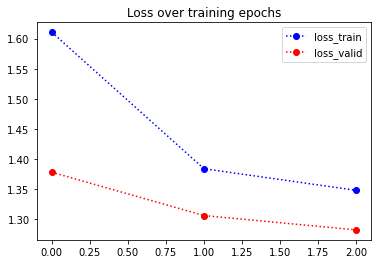

313/313 [==============================] - 1s 3ms/step - loss: 1.3520 - accuracy: 0.4995

TEST LOSS AND ACCURACY =  [1.3520275354385376, 0.49950000643730164]


In [5]:
if __name__ == '__main__':
    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # exemple pour visualiser la 11 ème image
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()

    nb_classes = 10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    
    # on réserve une base de valid
    FIN_APP = 20000
    DEBUT_VALID = 59000
    x_valid = x_train[DEBUT_VALID:,:,:]
    y_valid = y_train[DEBUT_VALID:]
    x_train = x_train[:FIN_APP,:,:] 
    y_train = y_train[:FIN_APP]
    ###########################################################################
    # passage en encodage one-hot vector
    y_train = to_categorical(y_train, nb_classes)
    y_test = to_categorical(y_test, nb_classes)
    y_valid = to_categorical(y_valid, nb_classes)
    ###########################################################################
    # Déclaration et compilation du réseau recurrent
    le_reseau = rnn_classif_network(T, D)
    ###########################################################################
    # Apprentissage du réseau avec batch de None
    # Base de validation testee à la fin de chaque époque
    # nb_epch = 3 pour le moment
    # la méthode renvoie l'historique de l'apprentissage
    Enregistrement = le_reseau.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_valid, y_valid))

    ###########################################################################
    # On visualise l'historique de l'apprentissage
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']
    metric_train = Enregistrement.history['accuracy']
    metric_valid = Enregistrement.history['val_accuracy']
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid")
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()

    ############################################################################
    #on teste les performances du réseau entrainé
    loss_test = le_reseau.evaluate(x_test, y_test)
    print("\nTEST LOSS AND ACCURACY = ", loss_test)


### 2. En vous inspirant du réseau de la première question,  completez la fonction rnn_classif_network et completez le code suivant :

In [7]:
def rnn_classif_network(T, D, couche, type_):   
    inputs = Input(name='input', shape=[T, D])
    layer = couche(50, return_sequences=False)(inputs)
    predictions = Dense(10, activation='softmax')(layer)
    network = Model(inputs=inputs, outputs=predictions)
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

(60000, 28, 28)


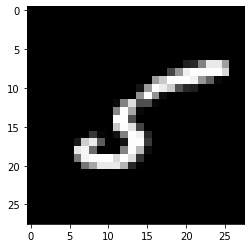

Epoch 1/10
625/625 [==============================] - 8s 10ms/step - loss: 1.1985 - accuracy: 0.6030 - val_loss: 0.6418 - val_accuracy: 0.7920
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 0.6319 - accuracy: 0.7879 - val_loss: 0.5010 - val_accuracy: 0.8440
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5154 - accuracy: 0.8266 - val_loss: 0.4607 - val_accuracy: 0.8510
Epoch 4/10
625/625 [==============================] - 5s 9ms/step - loss: 0.4651 - accuracy: 0.8439 - val_loss: 0.4342 - val_accuracy: 0.8790
Epoch 5/10
625/625 [==============================] - 5s 9ms/step - loss: 0.4261 - accuracy: 0.8577 - val_loss: 0.4034 - val_accuracy: 0.8760
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3964 - accuracy: 0.8652 - val_loss: 0.3897 - val_accuracy: 0.8720
Epoch 7/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3711 - accuracy: 0.8748 - val_loss: 0.4015 - val_accuracy: 0.8730
Epoch

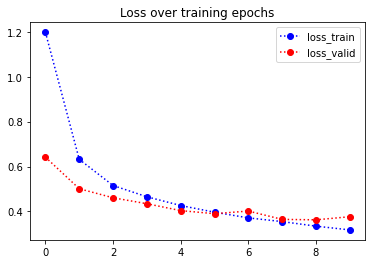

313/313 [==============================] - 1s 4ms/step - loss: 0.3765 - accuracy: 0.8752

TEST LOSS AND ACCURACY =  [0.3764668405056, 0.8751999735832214]


In [8]:
if __name__ == '__main__':
    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # exemple pour visualiser la 11 ème image
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()

    nb_classes = 10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    # on réserve une base de valid
    FIN_APP = 20000
    DEBUT_VALID = 59000
    x_valid = x_train[DEBUT_VALID:,:,:]
    y_valid = y_train[DEBUT_VALID:]
    x_train = x_train[:FIN_APP,:,:]
    y_train = y_train[:FIN_APP]
    ###########################################################################
    # passage en encodage one-hot vector
    y_train = to_categorical(y_train, nb_classes)
    y_test = to_categorical(y_test, nb_classes)
    y_valid = to_categorical(y_valid, nb_classes)
    ###########################################################################
    # Déclaration et compilation du réseau recurrent : utilisez un LSTM
    le_reseau = rnn_classif_network(T, D, LSTM, "LSTM")
    ###########################################################################
    # Apprentissage du réseau avec batch de 10
    # Base de validation testee à la fin de chaque époque
    # nb_epch = 10 pour le moment
    # la méthode renvoie l'historique de l'apprentissage
    Enregistrement = le_reseau.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

    ###########################################################################
    # On visualise l'historique de l'apprentissage
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']
    metric_train = Enregistrement.history['accuracy']
    metric_valid = Enregistrement.history['val_accuracy']
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid")
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()

    ############################################################################
    #on teste les performances du réseau entrainé
    loss_test = le_reseau.evaluate(x_test, y_test)
    print("\nTEST LOSS AND ACCURACY = ", loss_test)

# Meilleur modèle

In [9]:
# Définir le reseau LSTM
net = rnn_classif_network(T, D, LSTM, "LSTM")
cp = ModelCheckpoint("best.h5", verbose=1, save_best_only=True)
callback_list = [cp]
history = net.fit(x_train, y_train, epochs=10, validation_data=[x_valid, y_valid],
                  callbacks=callback_list, verbose=0)
print(history.history["loss"])

# on teste les performances du réseau entrainé
loss_train = net.evaluate(x_train, y_train)
print("\nTRAIN LOSS AND ACCURACY = ", loss_train)
net.load_weights("best.h5")
loss_test = net.evaluate(x_test, y_test)


Epoch 1: val_loss improved from inf to 0.65407, saving model to best.h5

Epoch 2: val_loss improved from 0.65407 to 0.52615, saving model to best.h5

Epoch 3: val_loss improved from 0.52615 to 0.51672, saving model to best.h5

Epoch 4: val_loss improved from 0.51672 to 0.43296, saving model to best.h5

Epoch 5: val_loss improved from 0.43296 to 0.41568, saving model to best.h5

Epoch 6: val_loss did not improve from 0.41568

Epoch 7: val_loss improved from 0.41568 to 0.39378, saving model to best.h5

Epoch 8: val_loss improved from 0.39378 to 0.36490, saving model to best.h5

Epoch 9: val_loss did not improve from 0.36490

Epoch 10: val_loss did not improve from 0.36490
[1.199218511581421, 0.6150553226470947, 0.5068206787109375, 0.4516957402229309, 0.4152461290359497, 0.38572561740875244, 0.36007294058799744, 0.3384416699409485, 0.32217350602149963, 0.30446135997772217]
625/625 [==============================] - 3s 4ms/step - loss: 0.2897 - accuracy: 0.9021

TRAIN LOSS AND ACCURACY = 

In [10]:
print(len(x_train))

20000


In [11]:
print(len(x_valid))

1000
